In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# > ***Evaluation of K-Nearest Neighbours Classifier Performance on Iris Dataset with Adjusted Rand Index and Confusion Matrix Analysis and plotting the data***

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.cluster import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()
# print(iris)

In [4]:
X, y = iris.data, iris.target

print(X.shape, len(y))

(150, 4) 150


In [5]:
j = [0.2,0.3,0.4,0.5] #test size

k = [3,4] #nearest neighbor

(120, 4) (30, 4) 120 30
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] 30
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] 30
ARI 1.0 for 0.2 test size and nearest neighbor is = 1
for class 1: True Positive = 11 True Negative = 19 False Positive = 0 False Negative = 0
True Positive Rate: 1.0, False Positive Rate: 0.0, Precision Value: 1.0, Recall Value: 1.0
Confustion Matrix for Test Size 0.2 with Nearest Neighbor = 1
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
*************************************************************

(105, 4) (45, 4) 105 45
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0] 45
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0] 45
ARI 1.0 for 0.3 test size and nearest neighbor is = 1
for class 1: True Positive = 13 True Negative = 32 False Positive = 0 False Negative = 0
True Positive Rate: 1.0, False Positive Rate: 0.0, Precision Value: 1.0, Recall Value: 1.0


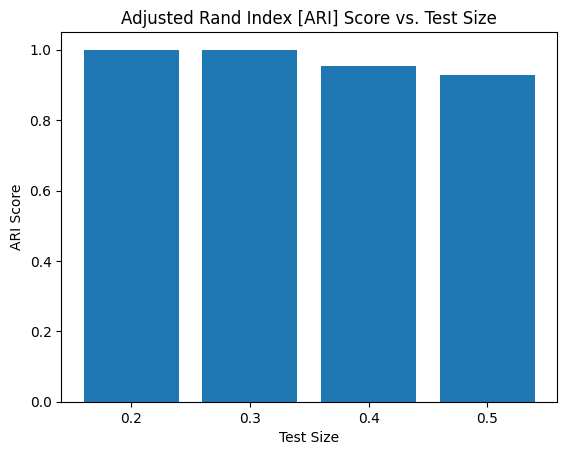

(120, 4) (30, 4) 120 30
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] 30
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0] 30
ARI 1.0 for 0.2 test size and nearest neighbor is = 1
for class 1: True Positive = 11 True Negative = 19 False Positive = 0 False Negative = 0
True Positive Rate: 1.0, False Positive Rate: 0.0, Precision Value: 1.0, Recall Value: 1.0
Confustion Matrix for Test Size 0.2 with Nearest Neighbor = 1
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
*************************************************************

(105, 4) (45, 4) 105 45
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0] 45
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0] 45
ARI 1.0 for 0.3 test size and nearest neighbor is = 1
for class 1: True Positive = 13 True Negative = 32 False Positive = 0 False Negative = 0
True Positive Rate: 1.0, False Positive Rate: 0.0, Precision Value: 1.0, Recall Value: 1.0


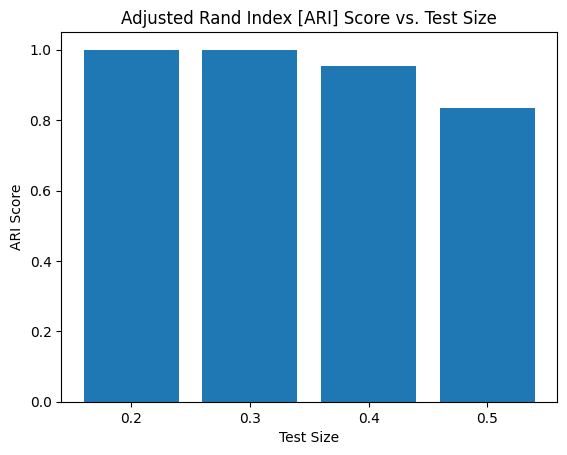

In [6]:
for l in k:
    clf = KNeighborsClassifier(n_neighbors = l)
    adj_rand_scores = []
    
    for i in j:
        X_train, test_x, y_train, test_lab = train_test_split(X, y, test_size = i, random_state = 42)
        print(X_train.shape, test_x.shape, len(y_train), len(test_lab))
        
        clf = clf.fit(X_train, y_train)
        test_pred_deci_tree = clf.predict(test_x)
        
        print(test_pred_deci_tree, len(test_pred_deci_tree))
        print(test_lab, len(test_lab))
        
        print(f'ARI {adjusted_rand_score(test_pred_deci_tree, test_lab)} for {i} test size and nearest neighbor is = {1}')
        
        adj_rand_scores.append(adjusted_rand_score(test_pred_deci_tree, test_lab))
        
        y_pred = np.asarray(test_pred_deci_tree)
        y_true = np.asarray(test_lab)
        
        FP = np.logical_and(y_true != y_pred, y_pred == 2).sum()
        FN = np.logical_and(y_true != y_pred, y_pred != 2).sum()
        TP = np.logical_and(y_true == y_pred, y_pred == 2).sum()
        TN = np.logical_and(y_true == y_pred, y_pred != 2).sum()
        print(f'for class 1: True Positive = {TP} True Negative = {TN} False Positive = {FP} False Negative = {FN}')
        TPR = TP/(TP+FN)
        FPR = FP/(FP+TN)
        Prec = TP/(TP+FP)
        Rec = TP/(TP+FN)
        print(f'True Positive Rate: {TPR}, False Positive Rate: {FPR}, Precision Value: {Prec}, Recall Value: {Rec}')
        
        print(f'Confustion Matrix for Test Size {i} with Nearest Neighbor = {1}')
        print(confusion_matrix(y_pred,y_true))
        print("*************************************************************")
        print("")
    print(adj_rand_scores)
    
#   plotting
    j1 = ["0.2","0.3","0.4","0.5"]
    plt.bar(j1, adj_rand_scores)
    plt.xlabel("Test Size")
    plt.ylabel("ARI Score")
    plt.title("Adjusted Rand Index [ARI] Score vs. Test Size")
    plt.show()